In [12]:
import pandas as pd

# Load  dataset
df = pd.read_csv("Breast_Cancer.csv")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [14]:
# Drop unnecessary columns
df.drop(columns=["id", "Unnamed: 32"], inplace=True)

# Encode diagnosis: M = 1, B = 0
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Features and target
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# k-NN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.956140350877193


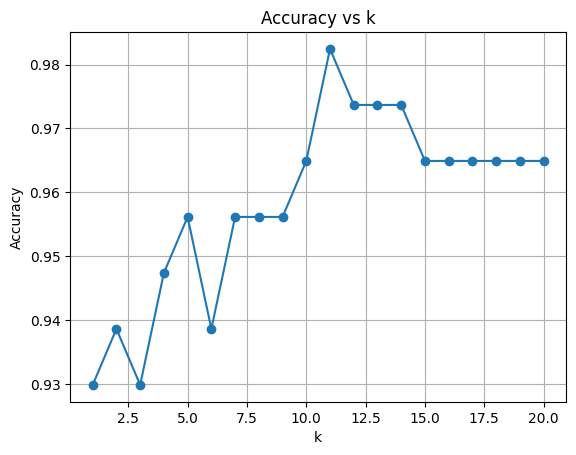

In [16]:
import matplotlib.pyplot as plt

accuracy_scores = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k")
plt.grid(True)
plt.show()

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[71  0]
 [ 4 39]]


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_s, y_train_s)
y_pred_s = knn_scaled.predict(X_test_s)

print("Accuracy after scaling:", accuracy_score(y_test_s, y_pred_s))


Accuracy after scaling: 0.9473684210526315


In [19]:
important_features = ["radius_mean", "texture_mean", "smoothness_mean"]
X_subset = df[important_features]

X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_subset, y, test_size=0.2, random_state=42)

knn_sub = KNeighborsClassifier(n_neighbors=5)
knn_sub.fit(X_train_sub, y_train_sub)
y_pred_sub = knn_sub.predict(X_test_sub)

print("Subset Accuracy:", accuracy_score(y_test_sub, y_pred_sub))

Subset Accuracy: 0.9035087719298246


In [21]:
from sklearn.feature_selection import SelectKBest, f_classif

# Full feature set
X_full = df.drop("diagnosis", axis=1)

# Select top 10 features
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X_full, y)

# Get selected feature names
selected_features = X_full.columns[selector.get_support()]
print("Top 10 features:", selected_features.tolist())


Top 10 features: ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_worst']


In [22]:
# Use selected top features
X_top = df[selected_features]
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y, test_size=0.2, random_state=42)

# Train k-NN
knn_top = KNeighborsClassifier(n_neighbors=5)
knn_top.fit(X_train_top, y_train_top)
y_pred_top = knn_top.predict(X_test_top)

# Accuracy
print("Top Feature Accuracy:", accuracy_score(y_test_top, y_pred_top))


Top Feature Accuracy: 0.9473684210526315


In [20]:
for ratio in [0.4, 0.2]:
    X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_scaled, y, test_size=ratio, random_state=42)
    knn_r = KNeighborsClassifier(n_neighbors=5)
    knn_r.fit(X_train_r, y_train_r)
    y_pred_r = knn_r.predict(X_test_r)
    print(f"Accuracy with {int((1-ratio)*100)}-{int(ratio*100)} split:", accuracy_score(y_test_r, y_pred_r))

Accuracy with 60-40 split: 0.9605263157894737
Accuracy with 80-20 split: 0.9473684210526315
